In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import activations

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('./Data/forestfires.csv')

data = df.copy()

In [36]:
'''
X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84
'''

"\nX - x-axis spatial coordinate within the Montesinho park map: 1 to 9\n\nY - y-axis spatial coordinate within the Montesinho park map: 2 to 9\n\nmonth - month of the year: 'jan' to 'dec'\n\nday - day of the week: 'mon' to 'sun'\n\nFFMC - FFMC index from the FWI system: 18.7 to 96.20\n\nDMC - DMC index from the FWI system: 1.1 to 291.3\n\nDC - DC index from the FWI system: 7.9 to 860.6\n\nISI - ISI index from the FWI system: 0.0 to 56.10\n\ntemp - temperature in Celsius degrees: 2.2 to 33.30\n\nRH - relative humidity in %: 15.0 to 100\n\nwind - wind speed in km/h: 0.40 to 9.40\n\nrain - outside rain in mm/m2 : 0.0 to 6.4\n\narea - the burned area of the forest (in ha): 0.00 to 1090.84\n"

In [37]:
mont = {
        'dec': 'winter',
        'jan': 'winter',
        'feb': 'winter',
        'mar': 'spring',
        'apr': 'spring',
        'may': 'spring',
        'jun': 'summer',
        'jul': 'summer',
        'aug': 'summer',
        'sep': 'autumn',
        'oct': 'autumn',
        'nov': 'autumn'
    }
data['seasons'] = data.month.map(mont)

data.day.replace(
    ('mon','tue','wed','thu','fri','sat','sun'),
    (1,2,3,4,5,6,7), 
    inplace=True
)

data.seasons.replace(
    ('winter', 'spring', 'summer', 'autumn'),
    (1, 2, 3, 4), inplace=True
)

In [38]:
data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   seasons  
0        2  
1        4  
2        4  
3        2  
4        2

In [39]:
def damage(area):

    if area == 0.0:
        return 'no-damage'
    else:
        return 'damage'

data['damage'] = data['area'].apply(damage)

data['damage'].replace(
    {'damage':1, 'no-damage':0},
    inplace=True
)

In [40]:
data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   seasons  damage  
0        2       0  
1        4       0  
2        4       0  
3        2       0  
4        2       0

In [41]:
n_row, n_col = data.shape

print(f'total number of rows is {n_row}, total number of columns is {n_col}')

total number of rows is 517, total number of columns is 15


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        517 non-null    int64  
 1   Y        517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    int64  
 4   FFMC     517 non-null    float64
 5   DMC      517 non-null    float64
 6   DC       517 non-null    float64
 7   ISI      517 non-null    float64
 8   temp     517 non-null    float64
 9   RH       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
 13  seasons  517 non-null    int64  
 14  damage   517 non-null    int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 60.7+ KB


In [43]:
data.describe().T

count        mean         std   min    25%     50%     75%      max
X        517.0    4.669246    2.313778   1.0    3.0    4.00    7.00     9.00
Y        517.0    4.299807    1.229900   2.0    4.0    4.00    5.00     9.00
day      517.0    4.259188    2.072929   1.0    2.0    5.00    6.00     7.00
FFMC     517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC      517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC       517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI      517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp     517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH       517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind     517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain     517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area     517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
seasons  517.0    3.117988    0.846565   1.0    3.0    3.00    4.00     4.00
damage   517.0    0.522244    0.499989   0.0    0.0    1.00    1.00     1.00

In [44]:
#! Which months are more likely forest fires ?
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [45]:
data[data['area'] > data.area.std()].sort_values(by='area', ascending=False).head()

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area  \
238  6  5   sep    6  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84   
415  8  6   aug    4  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28   
479  7  4   jul    1  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53   
237  1  2   sep    2  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88   
236  2  2   sep    6  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94   

     seasons  damage  
238        4       1  
415        3       1  
479        3       1  
237        4       1  
236        4       1

In [46]:
data[(data['area'] > 0) & (data['month'] == 'aug')].agg(['mean', 'max', 'min'])

X         Y month       day       FFMC         DMC          DC  \
mean  4.606061  4.414141   NaN  4.383838  92.676768  151.541414  638.174747   
max   9.000000  8.000000   aug  7.000000  96.200000  273.800000  819.100000   
min   1.000000  2.000000   aug  1.000000  81.600000   56.700000  480.800000   

            ISI      temp         RH      wind      rain       area  seasons  \
mean  11.783838  22.39798  44.252525  4.138384  0.078788   23.21202      3.0   
max   22.700000  33.30000  96.000000  8.900000  6.400000  746.28000      3.0   
min    1.900000   5.10000  22.000000  0.400000  0.000000    0.09000      3.0   

      damage  
mean     1.0  
max      1.0  
min      1.0

In [47]:
data[(data['area'] > 0) & (data['month'] == 'sep')].agg(['mean', 'max', 'min'])

X         Y month       day       FFMC         DMC          DC  \
mean  4.309278  4.185567   NaN  4.164948  91.217526  123.590722  739.670103   
max   9.000000  6.000000   sep  7.000000  94.300000  291.300000  860.600000   
min   1.000000  2.000000   sep  1.000000  63.500000   53.300000  665.300000   

            ISI       temp         RH      wind  rain         area  seasons  \
mean   8.313402  19.624742  42.494845  3.574227   0.0    31.815773      4.0   
max   17.900000  29.600000  78.000000  7.600000   0.0  1090.840000      4.0   
min    0.800000  10.100000  15.000000  0.900000   0.0     0.330000      4.0   

      damage  
mean     1.0  
max      1.0  
min      1.0

In [48]:
'''
As observed earlier, the variance (the spread of data points from the mean) 
turned out to be significantly high. As seen above, a large portion of the data 
falls within a small range, but a small portion has taken very high values.
'''
    
data['area'].var()

4052.063224823444

In [49]:
data.corr().area

X          0.063385
Y          0.044873
day        0.023226
FFMC       0.040122
DMC        0.072994
DC         0.049383
ISI        0.008258
temp       0.097844
RH        -0.075519
wind       0.012317
rain      -0.007366
area       1.000000
seasons    0.056005
damage     0.193224
Name: area, dtype: float64

In [50]:
z_scores = np.abs((data['area'] - data['area'].mean()) / data['area'].std())

outliers = data[z_scores > 3]
outliers

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area  \
237  1  2   sep    2  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88   
238  6  5   sep    6  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84   
415  8  6   aug    4  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28   
479  7  4   jul    1  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53   

     seasons  damage  
237        4       1  
238        4       1  
415        3       1  
479        3       1

* As seen above, there is a lot outlier values

In [51]:
data.month.replace(
    ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    inplace=True
)

In [52]:
y = data['area']
X = data.drop(columns='area', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [98]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1]:
!pip install --upgrade tensorflow

In [161]:
def ann_model(
    hid_act_fun, output_act_fun, traindata, trainlabel, epochs, optimizer_fun
    ):

    model = Sequential()

    model.add(Input(X_train.shape[1]))

    model.add(Dense(units=256, activation=hid_act_fun))
    model.add(Dropout(0.2))

    model.add(Dense(units=128, activation=hid_act_fun))
    model.add(Dropout(0.15))

    model.add(Dense(units=64, activation=hid_act_fun))
    model.add(Dropout(0.1))

    model.add(Dense(units=64, activation=hid_act_fun))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation=hid_act_fun))
    model.add(Dropout(0.7))

    model.add(Dense(16, activation=hid_act_fun))
    model.add(Dropout(0.05))

    model.add(Dense(8, activation=hid_act_fun))
    model.add(Dropout(0.05))

    model.add(Dense(4, activation=hid_act_fun))
    model.add(Dropout(0.05))

    model.add(Dense(1, activation=output_act_fun))

    model.compile(
        optimizer=optimizer_fun,
        loss=['mean_absolute_error', 'mean_squared_error'],
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    model.fit(traindata, trainlabel, validation_split=0.1, epochs=epochs)
    model.summary()

    return model

def loss_graph(model_history):
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'], color='green')
    plt.legend(['loss', 'val_loss'])
    plt.show()

### Adam

##### Relu-Relu-Adam  22-16000

In [145]:
ann_rra = ann_model(
    hid_act_fun='relu', output_act_fun='relu', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_rra = ann_rra.history

Epoch 1/1000
13/13 [==============================] - 3s 30ms/step - loss: 11.2660 - mean_absolute_error: 11.2660 - mean_squared_error: 2218.0134 - val_loss: 9.6467 - val_mean_absolute_error: 9.6467 - val_mean_squared_error: 1088.4568
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1228 - mean_absolute_error: 11.1228 - mean_squared_error: 2211.3147 - val_loss: 9.3390 - val_mean_absolute_error: 9.3390 - val_mean_squared_error: 1075.8654
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.7358 - mean_absolute_error: 10.7358 - mean_squared_error: 2181.1616 - val_loss: 8.7077 - val_mean_absolute_error: 8.7077 - val_mean_squared_error: 1046.5305
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.3012 - mean_absolute_error: 10.3012 - mean_squared_error: 2143.7197 - val_loss: 8.6154 - val_mean_absolute_error: 8.6154 - val_mean_squared_error: 1018.0110
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [141]:
ann_rra.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 22.6314 - mean_absolute_error: 22.6314 - mean_squared_error: 16037.7480


[22.631357192993164, 22.631357192993164, 16037.748046875]

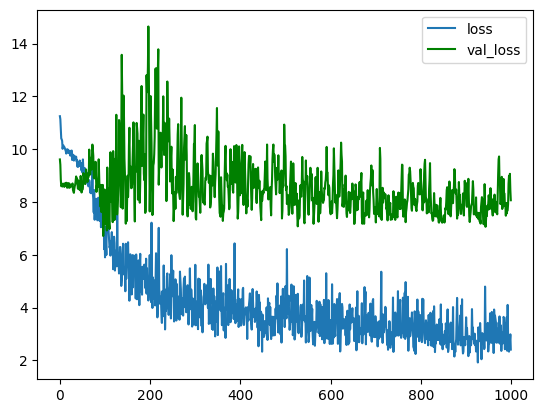

In [142]:
loss_graph(history_rra)

##### Relu-Linear-Adam 22-16000

In [127]:
ann_rla = ann_model(
    hid_act_fun='relu', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_rla = ann_rla.history

Epoch 1/1000
13/13 [==============================] - 3s 30ms/step - loss: 11.2814 - mean_absolute_error: 11.2814 - mean_squared_error: 2220.3035 - val_loss: 9.6888 - val_mean_absolute_error: 9.6888 - val_mean_squared_error: 1089.8051
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2482 - mean_absolute_error: 11.2482 - mean_squared_error: 2218.1729 - val_loss: 9.6297 - val_mean_absolute_error: 9.6297 - val_mean_squared_error: 1087.3983
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1241 - mean_absolute_error: 11.1241 - mean_squared_error: 2208.4534 - val_loss: 9.3176 - val_mean_absolute_error: 9.3176 - val_mean_squared_error: 1074.9891
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.7767 - mean_absolute_error: 10.7767 - mean_squared_error: 2180.3572 - val_loss: 8.7113 - val_mean_absolute_error: 8.7113 - val_mean_squared_error: 1034.2460
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [130]:
ann_rla.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 22.2784 - mean_absolute_error: 22.2784 - mean_squared_error: 15983.3193


[22.278352737426758, 22.278352737426758, 15983.3193359375]

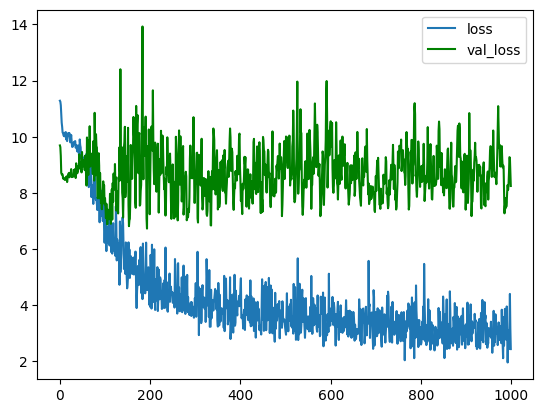

In [131]:
loss_graph(history_rla)

##### Relu-Sigmoid-Adam 22-16000

In [103]:
ann_rsa = ann_model(
    hid_act_fun='relu', output_act_fun='sigmoid', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_rsa = ann_rsa.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.2483 - mean_absolute_error: 11.2483 - mean_squared_error: 2209.0461 - val_loss: 9.6435 - val_mean_absolute_error: 9.6435 - val_mean_squared_error: 1081.3164
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 11.2319 - mean_absolute_error: 11.2319 - mean_squared_error: 2209.3975 - val_loss: 9.6049 - val_mean_absolute_error: 9.6049 - val_mean_squared_error: 1081.5560
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1613 - mean_absolute_error: 11.1613 - mean_squared_error: 2210.1787 - val_loss: 9.4908 - val_mean_absolute_error: 9.4908 - val_mean_squared_error: 1081.1499
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 11.0756 - mean_absolute_error: 11.0756 - mean_squared_error: 2208.9729 - val_loss: 9.4301 - val_mean_absolute_error: 9.4301 - val_mean_squared_error: 1080.7982
Epoch 5/1000
13/13 [==============================] - 0s 7ms/st

In [104]:
ann_rsa.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 22.1649 - mean_absolute_error: 22.1649 - mean_squared_error: 15998.2500


[22.16486930847168, 22.16486930847168, 15998.25]

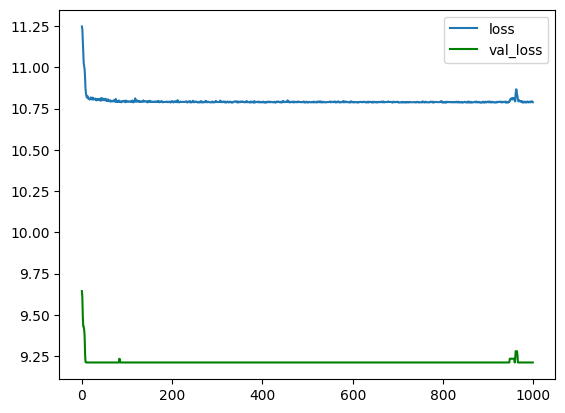

In [105]:
loss_graph(history_rsa)

##### Relu-tanh-Adam 22-16000

In [106]:
ann_rta = ann_model(
    hid_act_fun='relu', output_act_fun='tanh', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_rta = ann_rta.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.2702 - mean_absolute_error: 11.2702 - mean_squared_error: 2219.2290 - val_loss: 9.7002 - val_mean_absolute_error: 9.7002 - val_mean_squared_error: 1090.1643
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 11.2521 - mean_absolute_error: 11.2521 - mean_squared_error: 2218.0522 - val_loss: 9.6762 - val_mean_absolute_error: 9.6762 - val_mean_squared_error: 1089.1880
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 11.1988 - mean_absolute_error: 11.1988 - mean_squared_error: 2215.3994 - val_loss: 9.5409 - val_mean_absolute_error: 9.5409 - val_mean_squared_error: 1084.5994
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 11.0547 - mean_absolute_error: 11.0547 - mean_squared_error: 2206.7310 - val_loss: 9.2625 - val_mean_absolute_error: 9.2625 - val_mean_squared_error: 1073.8574
Epoch 5/1000
13/13 [==============================] - 0s 7ms/st

In [107]:
ann_rta.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 22.1778 - mean_absolute_error: 22.1778 - mean_squared_error: 15998.2627


[22.177827835083008, 22.177827835083008, 15998.2626953125]

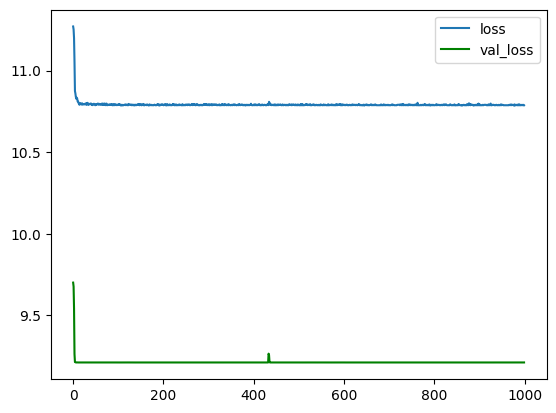

In [108]:
loss_graph(history_rta)

##### Tanh-Tanh-Adam 22-16000

In [109]:
ann_tta = ann_model(
    hid_act_fun='tanh', output_act_fun='tanh', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_tta = ann_tta.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.3680 - mean_absolute_error: 11.3680 - mean_squared_error: 2210.8882 - val_loss: 9.5570 - val_mean_absolute_error: 9.5570 - val_mean_squared_error: 1074.1718
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2142 - mean_absolute_error: 11.2142 - mean_squared_error: 2206.2876 - val_loss: 9.5753 - val_mean_absolute_error: 9.5753 - val_mean_squared_error: 1073.3423
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1480 - mean_absolute_error: 11.1480 - mean_squared_error: 2202.6931 - val_loss: 9.5370 - val_mean_absolute_error: 9.5370 - val_mean_squared_error: 1073.1659
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1078 - mean_absolute_error: 11.1078 - mean_squared_error: 2201.8784 - val_loss: 9.4891 - val_mean_absolute_error: 9.4891 - val_mean_squared_error: 1073.0980
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [110]:
ann_tta.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 22.2303 - mean_absolute_error: 22.2303 - mean_squared_error: 15998.2920


[22.230318069458008, 22.230318069458008, 15998.2919921875]

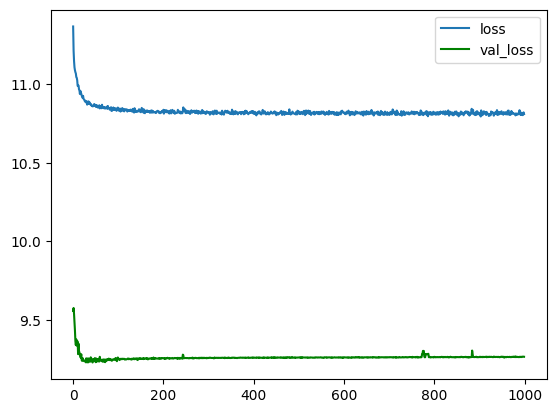

In [111]:
loss_graph(history_tta)

##### Tanh-Linear-Adam 21-15800

In [132]:
ann_tla = ann_model(
    hid_act_fun='tanh', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_tla = ann_tla.history

Epoch 1/1000
13/13 [==============================] - 3s 30ms/step - loss: 11.3486 - mean_absolute_error: 11.3486 - mean_squared_error: 2212.2561 - val_loss: 9.4794 - val_mean_absolute_error: 9.4794 - val_mean_squared_error: 1070.8163
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1267 - mean_absolute_error: 11.1267 - mean_squared_error: 2202.2451 - val_loss: 9.2989 - val_mean_absolute_error: 9.2989 - val_mean_squared_error: 1064.9728
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.9796 - mean_absolute_error: 10.9796 - mean_squared_error: 2194.6528 - val_loss: 9.2507 - val_mean_absolute_error: 9.2507 - val_mean_squared_error: 1061.8123
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.9778 - mean_absolute_error: 10.9778 - mean_squared_error: 2193.1172 - val_loss: 9.1663 - val_mean_absolute_error: 9.1663 - val_mean_squared_error: 1060.4435
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [133]:
ann_tla.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 21.5803 - mean_absolute_error: 21.5803 - mean_squared_error: 15773.6777


[21.580276489257812, 21.580276489257812, 15773.677734375]

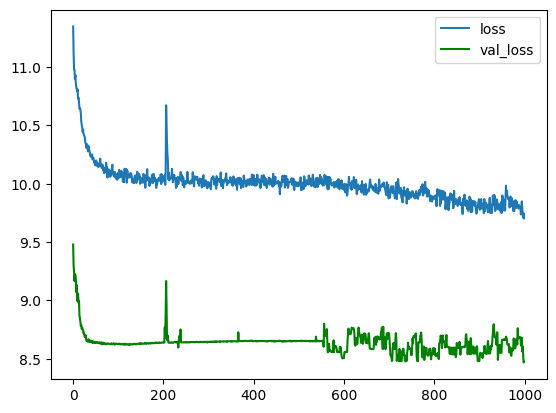

In [134]:
loss_graph(history_tla)

##### Tanh-Relu-Adam 21-15800

In [112]:
ann_tra = ann_model(
    hid_act_fun='tanh', output_act_fun='relu', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_tra = ann_tra.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.1176 - mean_absolute_error: 11.1176 - mean_squared_error: 2213.9299 - val_loss: 9.3129 - val_mean_absolute_error: 9.3129 - val_mean_squared_error: 1075.0317
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.9149 - mean_absolute_error: 10.9149 - mean_squared_error: 2204.7844 - val_loss: 9.1774 - val_mean_absolute_error: 9.1774 - val_mean_squared_error: 1070.2877
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.7937 - mean_absolute_error: 10.7937 - mean_squared_error: 2197.0266 - val_loss: 9.1169 - val_mean_absolute_error: 9.1169 - val_mean_squared_error: 1067.6362
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.7319 - mean_absolute_error: 10.7319 - mean_squared_error: 2195.9885 - val_loss: 9.0725 - val_mean_absolute_error: 9.0725 - val_mean_squared_error: 1065.5724
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [113]:
ann_tra.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 21.4274 - mean_absolute_error: 21.4274 - mean_squared_error: 15778.3877


[21.427387237548828, 21.427387237548828, 15778.3876953125]

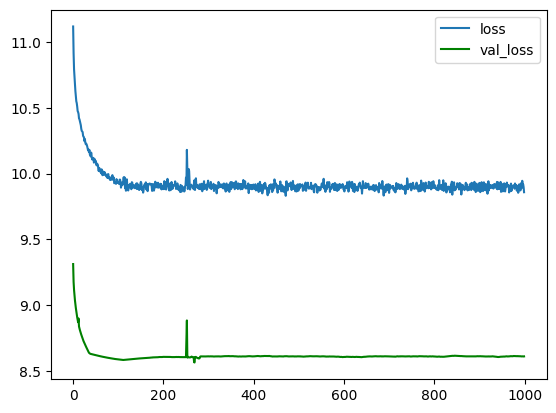

In [114]:
loss_graph(history_tra)

##### Tanh-Sigmoid-Adam 22-16000

In [115]:
ann_tsa = ann_model(
    hid_act_fun='tanh', output_act_fun='sigmoid', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_tsa = ann_tsa.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.1226 - mean_absolute_error: 11.1226 - mean_squared_error: 2204.6108 - val_loss: 9.3537 - val_mean_absolute_error: 9.3537 - val_mean_squared_error: 1074.8403
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.9741 - mean_absolute_error: 10.9741 - mean_squared_error: 2201.7502 - val_loss: 9.3151 - val_mean_absolute_error: 9.3151 - val_mean_squared_error: 1074.0121
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.9273 - mean_absolute_error: 10.9273 - mean_squared_error: 2201.1633 - val_loss: 9.3018 - val_mean_absolute_error: 9.3018 - val_mean_squared_error: 1073.7354
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 10.9009 - mean_absolute_error: 10.9009 - mean_squared_error: 2200.7336 - val_loss: 9.2933 - val_mean_absolute_error: 9.2933 - val_mean_squared_error: 1073.5546
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [116]:
ann_tsa.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 22.1649 - mean_absolute_error: 22.1649 - mean_squared_error: 15998.2500


[22.16487693786621, 22.16487693786621, 15998.25]

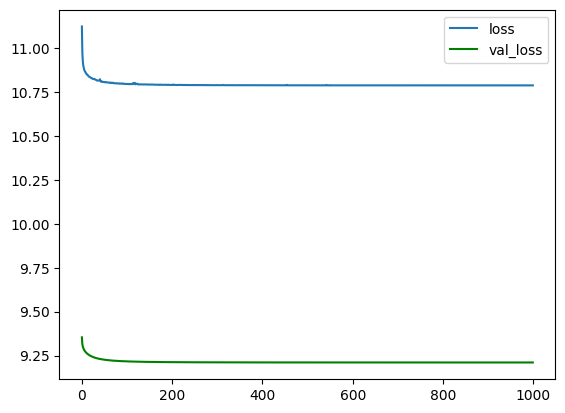

In [117]:
loss_graph(history_tsa)

##### Sigmoid-Sigmoid-Adam 22-16000

In [118]:
ann_ssa = ann_model(
    hid_act_fun='sigmoid', output_act_fun='sigmoid', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_ssa = ann_ssa.history

Epoch 1/1000
13/13 [==============================] - 3s 31ms/step - loss: 11.2532 - mean_absolute_error: 11.2532 - mean_squared_error: 2206.4414 - val_loss: 9.6455 - val_mean_absolute_error: 9.6455 - val_mean_squared_error: 1079.0807
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2537 - mean_absolute_error: 11.2537 - mean_squared_error: 2206.5137 - val_loss: 9.6455 - val_mean_absolute_error: 9.6455 - val_mean_squared_error: 1079.0858
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2467 - mean_absolute_error: 11.2467 - mean_squared_error: 2206.3469 - val_loss: 9.6456 - val_mean_absolute_error: 9.6456 - val_mean_squared_error: 1079.1473
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2541 - mean_absolute_error: 11.2541 - mean_squared_error: 2206.3540 - val_loss: 9.6458 - val_mean_absolute_error: 9.6458 - val_mean_squared_error: 1079.2036
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [119]:
ann_ssa.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 22.1649 - mean_absolute_error: 22.1649 - mean_squared_error: 15998.2500


[22.16489601135254, 22.16489601135254, 15998.25]

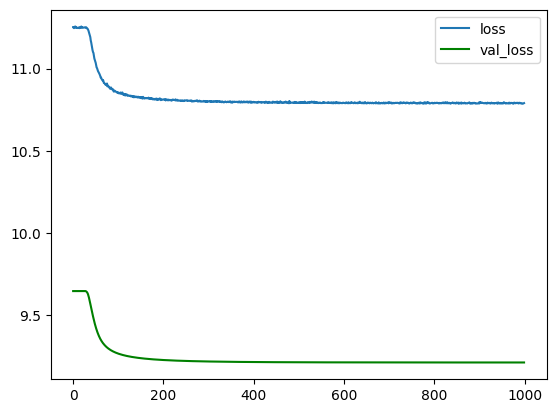

In [120]:
loss_graph(history_ssa)

##### Sigmoid-Linear-Adam 21-15800

In [136]:
ann_sla = ann_model(
    hid_act_fun='sigmoid', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_sla = ann_sla.history

Epoch 1/1000
13/13 [==============================] - 3s 30ms/step - loss: 11.3745 - mean_absolute_error: 11.3745 - mean_squared_error: 2221.2913 - val_loss: 9.7401 - val_mean_absolute_error: 9.7401 - val_mean_squared_error: 1091.2825
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2994 - mean_absolute_error: 11.2994 - mean_squared_error: 2219.9360 - val_loss: 9.6990 - val_mean_absolute_error: 9.6990 - val_mean_squared_error: 1089.5507
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2811 - mean_absolute_error: 11.2811 - mean_squared_error: 2218.5981 - val_loss: 9.6928 - val_mean_absolute_error: 9.6928 - val_mean_squared_error: 1088.6782
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2707 - mean_absolute_error: 11.2707 - mean_squared_error: 2217.3379 - val_loss: 9.6886 - val_mean_absolute_error: 9.6886 - val_mean_squared_error: 1088.0862
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [137]:
ann_sla.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 21.4514 - mean_absolute_error: 21.4514 - mean_squared_error: 15782.3877


[21.451406478881836, 21.451406478881836, 15782.3876953125]

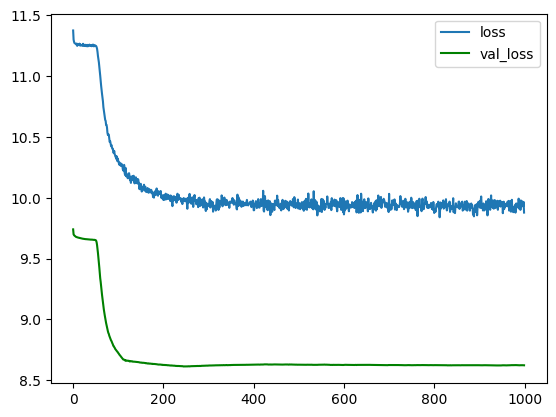

In [138]:
loss_graph(history_sla)

##### Sigmoid-Relu-Adam 21-15800

In [121]:
ann_sra = ann_model(
    hid_act_fun='sigmoid', output_act_fun='relu', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_sra = ann_sra.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.2670 - mean_absolute_error: 11.2670 - mean_squared_error: 2219.6506 - val_loss: 9.7066 - val_mean_absolute_error: 9.7066 - val_mean_squared_error: 1090.6313
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2539 - mean_absolute_error: 11.2539 - mean_squared_error: 2219.5452 - val_loss: 9.7066 - val_mean_absolute_error: 9.7066 - val_mean_squared_error: 1090.6313
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2729 - mean_absolute_error: 11.2729 - mean_squared_error: 2218.9229 - val_loss: 9.7066 - val_mean_absolute_error: 9.7066 - val_mean_squared_error: 1090.6313
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2689 - mean_absolute_error: 11.2689 - mean_squared_error: 2219.4958 - val_loss: 9.7066 - val_mean_absolute_error: 9.7066 - val_mean_squared_error: 1090.6313
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [122]:
ann_sra.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 21.4280 - mean_absolute_error: 21.4280 - mean_squared_error: 15780.2646


[21.428007125854492, 21.428007125854492, 15780.2646484375]

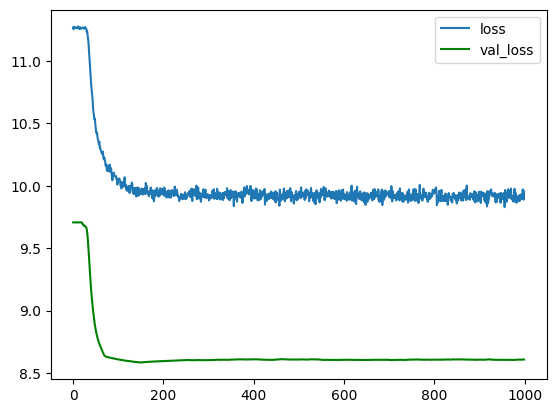

In [123]:
loss_graph(history_sra)

##### Sigmoid-Tanh-Adam 22-16000

In [124]:
ann_sta = ann_model(
    hid_act_fun='sigmoid', output_act_fun='tanh', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='adam'
)

history_sta = ann_sta.history

Epoch 1/1000
13/13 [==============================] - 3s 29ms/step - loss: 11.2457 - mean_absolute_error: 11.2457 - mean_squared_error: 2207.7375 - val_loss: 9.6489 - val_mean_absolute_error: 9.6489 - val_mean_squared_error: 1080.4448
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2474 - mean_absolute_error: 11.2474 - mean_squared_error: 2208.2209 - val_loss: 9.6486 - val_mean_absolute_error: 9.6486 - val_mean_squared_error: 1080.3423
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2482 - mean_absolute_error: 11.2482 - mean_squared_error: 2207.6567 - val_loss: 9.6483 - val_mean_absolute_error: 9.6483 - val_mean_squared_error: 1080.2231
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2508 - mean_absolute_error: 11.2508 - mean_squared_error: 2207.7407 - val_loss: 9.6481 - val_mean_absolute_error: 9.6481 - val_mean_squared_error: 1080.1514
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [125]:
ann_sta.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 22.1649 - mean_absolute_error: 22.1649 - mean_squared_error: 15998.2500


[22.16488265991211, 22.16488265991211, 15998.25]

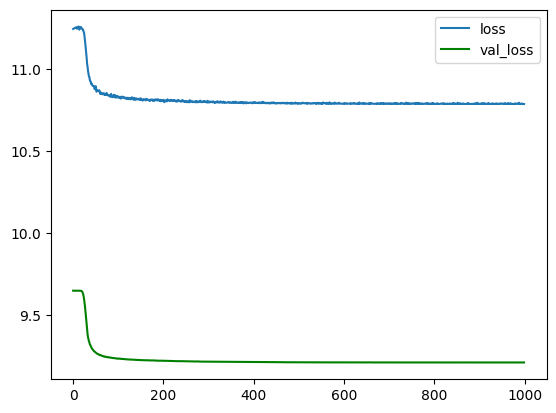

In [126]:
loss_graph(history_sta)

### RMSprop

In [146]:
ann_tlrms = ann_model(
    hid_act_fun='tanh', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='rmsprop'
)

history_tlrms = ann_tlrms.history

Epoch 1/1000
13/13 [==============================] - 2s 30ms/step - loss: 11.3219 - mean_absolute_error: 11.3219 - mean_squared_error: 2210.2388 - val_loss: 9.6492 - val_mean_absolute_error: 9.6492 - val_mean_squared_error: 1073.2091
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1400 - mean_absolute_error: 11.1400 - mean_squared_error: 2201.0117 - val_loss: 9.5184 - val_mean_absolute_error: 9.5184 - val_mean_squared_error: 1068.1737
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 11.1003 - mean_absolute_error: 11.1003 - mean_squared_error: 2196.3560 - val_loss: 9.2646 - val_mean_absolute_error: 9.2646 - val_mean_squared_error: 1066.8048
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.9839 - mean_absolute_error: 10.9839 - mean_squared_error: 2196.5391 - val_loss: 9.2646 - val_mean_absolute_error: 9.2646 - val_mean_squared_error: 1066.3470
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [147]:
ann_tlrms.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 21.5561 - mean_absolute_error: 21.5561 - mean_squared_error: 15815.3818


[21.556148529052734, 21.556148529052734, 15815.3818359375]

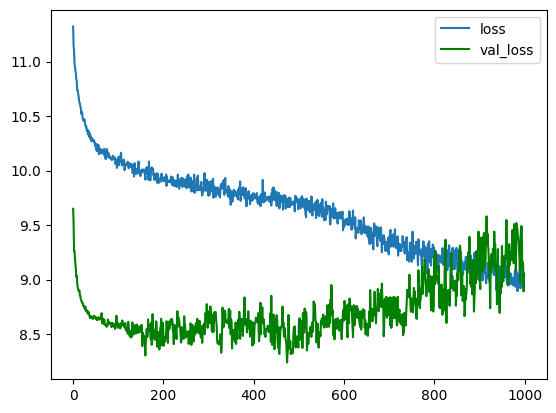

In [148]:
loss_graph(history_tlrms)

### SGD

In [149]:
ann_tlsgd = ann_model(
    hid_act_fun='tanh', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun='sgd'
)

history_tlsgd = ann_tlsgd.history

Epoch 1/1000
13/13 [==============================] - 2s 30ms/step - loss: 11.4295 - mean_absolute_error: 11.4295 - mean_squared_error: 2215.9663 - val_loss: 9.5190 - val_mean_absolute_error: 9.5190 - val_mean_squared_error: 1080.8822
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.2644 - mean_absolute_error: 11.2644 - mean_squared_error: 2210.1350 - val_loss: 9.3780 - val_mean_absolute_error: 9.3780 - val_mean_squared_error: 1074.6379
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1955 - mean_absolute_error: 11.1955 - mean_squared_error: 2202.8943 - val_loss: 9.2899 - val_mean_absolute_error: 9.2899 - val_mean_squared_error: 1070.9379
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.1002 - mean_absolute_error: 11.1002 - mean_squared_error: 2200.6562 - val_loss: 9.2019 - val_mean_absolute_error: 9.2019 - val_mean_squared_error: 1066.9851
Epoch 5/1000
13/13 [==============================] - 0s 8ms/st

In [150]:
ann_tlsgd.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 21.5588 - mean_absolute_error: 21.5588 - mean_squared_error: 15774.0303


[21.558759689331055, 21.558759689331055, 15774.0302734375]

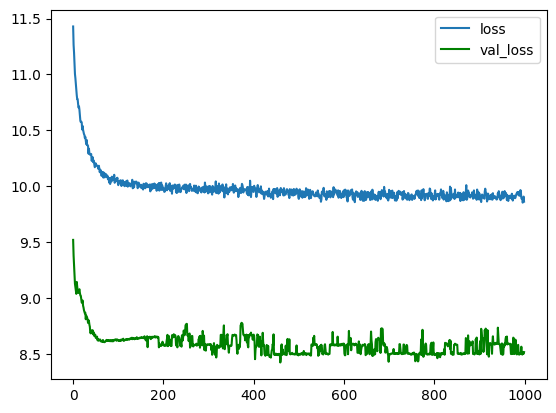

In [151]:
loss_graph(history_tlsgd)

### Adam(learning_rate=0.0001) 21-15800

In [156]:
ann_tla_0 = ann_model(
    hid_act_fun='tanh', output_act_fun='linear', 
    traindata=X_train, trainlabel=y_train, epochs=1000, optimizer_fun=optimizers.Adam(learning_rate=0.0001)
)

history_tla_0 = ann_tla_0.history

Epoch 1/1000
13/13 [==============================] - 3s 14ms/step - loss: 11.4394 - mean_absolute_error: 11.4394 - mean_squared_error: 2221.3201 - val_loss: 9.8015 - val_mean_absolute_error: 9.8015 - val_mean_squared_error: 1090.5927
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 11.4248 - mean_absolute_error: 11.4248 - mean_squared_error: 2222.4370 - val_loss: 9.7084 - val_mean_absolute_error: 9.7084 - val_mean_squared_error: 1087.9906
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 11.3711 - mean_absolute_error: 11.3711 - mean_squared_error: 2220.2268 - val_loss: 9.6373 - val_mean_absolute_error: 9.6373 - val_mean_squared_error: 1085.3400
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 11.3504 - mean_absolute_error: 11.3504 - mean_squared_error: 2218.0813 - val_loss: 9.5995 - val_mean_absolute_error: 9.5995 - val_mean_squared_error: 1083.3038
Epoch 5/1000
13/13 [==============================] - 0s 10ms/s

In [157]:
ann_tla_0.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 21.6436 - mean_absolute_error: 21.6436 - mean_squared_error: 15838.3994


[21.643625259399414, 21.643625259399414, 15838.3994140625]

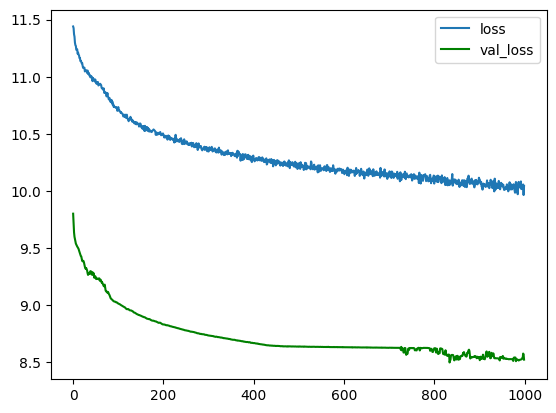

In [158]:
loss_graph(history_tla_0)